In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
from google.colab import files, drive

In [3]:
drive.mount('drive')

Mounted at drive


In [4]:
DIR = "/content/drive/MyDrive/Colab Notebooks/curve fitting/functions 2/"

In [5]:
#load data into notebooks
simple_data = np.load(DIR+'simple-linear.npy')
complex_data = np.load(DIR+'complex-linear.npy')
x = np.linspace(-20, 20, num=20*2+1, endpoint=True)

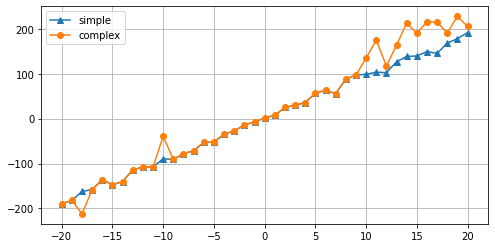

In [6]:
fig = plt.figure(figsize=[8, 4])
plt.plot(x, simple_data, label="simple", marker='^')
plt.plot(x, complex_data, label="complex", marker='o')
plt.grid('on')
plt.legend()

In [7]:
x

array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

In [8]:
X = np.array([np.array([i, 1]) for i in x])
simple_big_x = np.array([np.array([i, 1]) for i in x])
complex_big_x = np.array([np.array([i, 1]) for i in x])
simple_big_x.shape



(41, 2)

In [9]:
# Solve linear system of equations
A = (X.transpose()).dot(X)
A = np.linalg.inv(A)
A.shape

(2, 2)

In [10]:
b_simple = (X.transpose()).dot(simple_data)
b_complex = (X.transpose()).dot(complex_data)
b_simple, b_complex

(array([5.38660024e+04, 3.94776901e+01]),
 array([61737.98908287,   545.5100131 ]))

In [11]:
model_simple = A.dot(b_simple)
model_complex = A.dot(b_complex)

In [12]:
model_simple, model_complex

(array([9.38432097, 0.96287049]), array([10.75574723, 13.30512227]))

In [13]:
def linear_least_squares(x, y):
  X = np.array([np.array([i, 1]) for i in x])
  A = (X.transpose()).dot(X)
  A = np.linalg.inv(A)
  b = (X.transpose()).dot(y)
  mdl = A.dot(b)
  
  return mdl

In [14]:
model_simple2 = linear_least_squares(x, simple_data)
model_complex2 = linear_least_squares(x, complex_data)

In [15]:
model_simple2, model_complex2

(array([9.38432097, 0.96287049]), array([10.75574723, 13.30512227]))

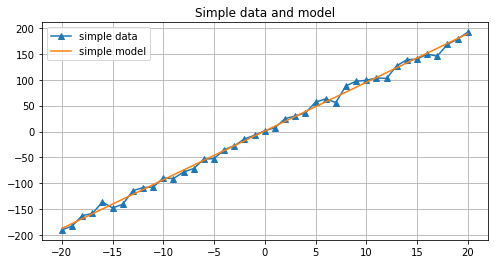

In [16]:
# Plot
fig = plt.figure(figsize=[8, 4])
plt.plot(x, simple_data, label="simple data", marker='^')
plt.plot(x, x*model_simple[0] + model_simple[1], label="simple model")
plt.grid('on')
plt.title("Simple data and model")
plt.legend()

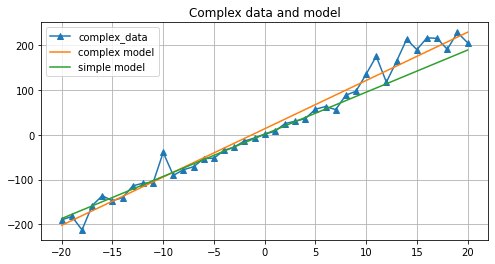

In [17]:
# Plot
fig = plt.figure(figsize=[8, 4])
plt.plot(x, complex_data, label="complex_data", marker='^')
plt.plot(x, x*model_complex[0] + model_complex[1], label="complex model")
plt.plot(x, x*model_simple[0] + model_simple[1], label="simple model")
plt.grid('on')
plt.title("Complex data and model")
plt.legend()

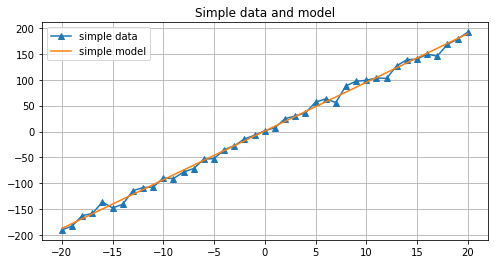

In [18]:
# Plot
fig = plt.figure(figsize=[8, 4])
plt.plot(x, simple_data, label="simple data", marker='^')
plt.plot(x, x*model_simple2[0] + model_simple2[1], label="simple model")
plt.grid('on')
plt.title("Simple data and model")
plt.legend()

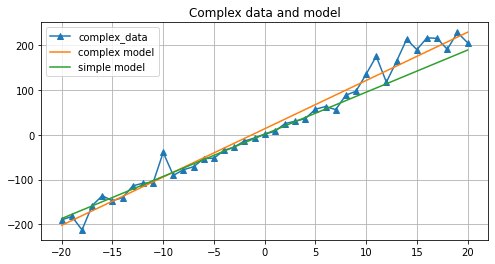

In [19]:
# Plot
fig = plt.figure(figsize=[8, 4])
plt.plot(x, complex_data, label="complex_data", marker='^')
plt.plot(x, x*model_complex2[0] + model_complex2[1], label="complex model")
plt.plot(x, x*model_simple2[0] + model_simple2[1], label="simple model")
plt.grid('on')
plt.title("Complex data and model")
plt.legend()

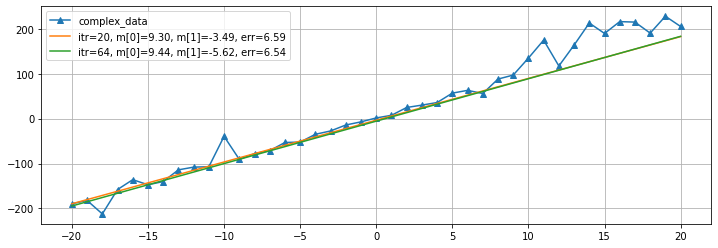

In [20]:
min_inlier_percentage = 0.75 # minimum percentage of inlier points
min_inlier = min_inlier_percentage*x.size # minimum number of inlier points
err_threshold = 20 # max distance an inlier point can be away from the model
inliers_indices = []
inlier_model = False
best_error = 1000000
best_coordinates = 0
best_x = 0
best_itr = 0

fig = plt.figure(figsize=[12, 4])
plt.plot(x, complex_data, label="complex_data", marker='^')

for i in range(1, 71):
  if inlier_model:
    x1 = np.array([x[i] for i in inliers_indices])
    y1 = np.array([complex_data[i] for i in inliers_indices])
  
    # Step 2 solve for model that fits through all inlier point in inlier_indices
    m = linear_least_squares(x1, y1)

  else:
    #otherwise, solve with 2 random points
    #S1: select random subset of pts from data in inlier list emtpy
    ind1 = np.random.randint(0, x.size)
    ind2 = np.random.randint(0, x.size)
    

    x1 = np.array([x[ind1], x[ind2]])
    y1 = np.array([complex_data[ind1], complex_data[ind2]])

    if ind1 == ind2:
      continue

    #S2 Find model
    m = linear_least_squares(x1, y1)

  #S3 Test if it passes min_inlier
  num_inliers = 0
  inliers_indices = []
  total_error = 0
  
  # Finds amount of inliers
  # error equal to sum of absolute distances from expected value to the real value
  for j in range(x.size):
    d = np.abs(complex_data[j]- m[0] * x[j] + m[1])
    if d <= err_threshold:
      # Count number of inliers
      num_inliers += 1
      # Store indices of inliers
      inliers_indices.append(j)
      # Add to error
      total_error += d

  # If yes, then this is a valid model, plot
  # Check if num_inliers is greater than min_inliers
  if num_inliers >= min_inlier:
    inlier_model = True
    avg_error = total_error/num_inliers
    plt.plot(x, m[0]*x+m[1], label="itr={0}, m[0]={1:2.2f}, m[1]={2:2.2f}, err={3:2.2f}".format(i, m[0], m[1], avg_error))
    
    #save best model
    if abs(avg_error) < best_error:
      best_error = avg_error
      best_coordinates = m
      best_x = x
      best_itr = i
  else:
    inliers_indices = []
    inlier_model = False


plt.legend()
plt.grid()





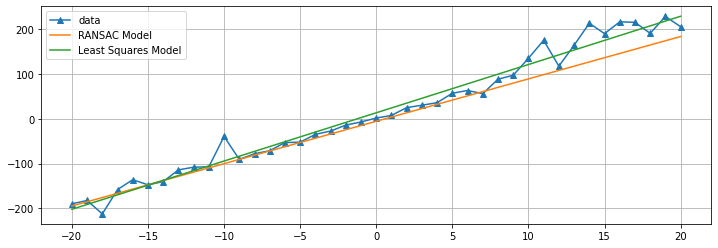

In [21]:
fig = plt.figure(figsize=[12, 4])
plt.plot(x, complex_data, label="data", marker='^')
plt.plot(best_x, best_coordinates[0]*best_x+best_coordinates[1], label="RANSAC Model".format(best_itr, best_coordinates[0], best_coordinates[1], best_error))
plt.plot(x, x*model_complex[0] + model_complex[1], label="Least Squares Model")
plt.legend()
plt.grid()
